# NLP. Linguistic Regularities in Continuous Space Word Representations

## Preliminaries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import timeit
import json
from gensim.models import KeyedVectors

In [ ]:
#loading pretrained word embeddings from GoogleNews with negative sampling and vector size = 300 (free available)
filename = 'GoogleNews-vectors-negative300.bin'
mymodel = KeyedVectors.load_word2vec_format(filename, binary = True)

In [6]:
mymodel.similarity('man', 'woman')
mymodel.most_similar(positive = ['man'])
#mymodel['man']

[('woman', 0.7664012312889099),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930751800537),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409236907959),
 ('teen_ager', 0.5549196004867554),
 ('men', 0.5489763021469116)]

In [7]:
mymodel.most_similar(positive = ['China', 'London'], negative = ['England'])

[('Beijing', 0.6737731695175171),
 ('Shanghai', 0.646628737449646),
 ('Beijng', 0.5856549739837646),
 ('Hong_Kong', 0.5709935426712036),
 ('Chinese', 0.5639771223068237),
 ('Guangdong', 0.5119545459747314),
 ('Shenzhen', 0.5102902054786682),
 ('Yanqi', 0.5076326727867126),
 ('Nanjing', 0.505686342716217),
 ('Guangzhou', 0.5043155550956726)]

In [8]:
with open('relations.json', 'r') as fp:
    testtuples = json.load(fp)
print(testtuples)

{'gram3-comparative': [['bad', 'worse'], ['big', 'bigger'], ['bright', 'brighter'], ['cheap', 'cheaper'], ['cold', 'colder'], ['cool', 'cooler'], ['deep', 'deeper'], ['easy', 'easier'], ['fast', 'faster'], ['good', 'better'], ['great', 'greater'], ['hard', 'harder'], ['heavy', 'heavier'], ['high', 'higher'], ['hot', 'hotter'], ['large', 'larger'], ['long', 'longer'], ['loud', 'louder'], ['low', 'lower'], ['new', 'newer'], ['old', 'older'], ['quick', 'quicker'], ['safe', 'safer'], ['sharp', 'sharper'], ['short', 'shorter'], ['simple', 'simpler'], ['slow', 'slower'], ['small', 'smaller'], ['smart', 'smarter'], ['strong', 'stronger'], ['tall', 'taller'], ['tight', 'tighter'], ['tough', 'tougher'], ['warm', 'warmer'], ['weak', 'weaker'], ['wide', 'wider'], ['young', 'younger']], 'gram8-plural': [['banana', 'bananas'], ['bird', 'birds'], ['bottle', 'bottles'], ['building', 'buildings'], ['car', 'cars'], ['cat', 'cats'], ['child', 'children'], ['cloud', 'clouds'], ['color', 'colors'], ['comp

In [9]:
testtuples.keys()

dict_keys(['gram3-comparative', 'gram8-plural', 'capital-common-countries', 'city-in-state', 'family', 'gram2-opposite', 'currency', 'gram4-superlative', 'gram6-nationality-adjective', 'gram7-past-tense', 'gram5-present-participle', 'capital-world', 'gram1-adjective-to-adverb'])

## Q1.

Write a function which when given one (capital city, country) training pair can predict the capital
of the other countries in the capital-common-countries list in testtuples.

In [10]:
#training data
TestTuples = testtuples['capital-common-countries']
country_train = 'Japan'
city_train = 'Tokyo'

In [11]:
TestTuples

[['Athens', 'Greece'],
 ['Baghdad', 'Iraq'],
 ['Bangkok', 'Thailand'],
 ['Beijing', 'China'],
 ['Berlin', 'Germany'],
 ['Bern', 'Switzerland'],
 ['Cairo', 'Egypt'],
 ['Canberra', 'Australia'],
 ['Hanoi', 'Vietnam'],
 ['Havana', 'Cuba'],
 ['Helsinki', 'Finland'],
 ['Islamabad', 'Pakistan'],
 ['Kabul', 'Afghanistan'],
 ['London', 'England'],
 ['Madrid', 'Spain'],
 ['Moscow', 'Russia'],
 ['Oslo', 'Norway'],
 ['Ottawa', 'Canada'],
 ['Paris', 'France'],
 ['Rome', 'Italy'],
 ['Stockholm', 'Sweden'],
 ['Tehran', 'Iran'],
 ['Tokyo', 'Japan']]

In [9]:
#the function to predict a capital by given associated pair (capital, country) in a given dataset
#returns a list of predicted capital-country pairs
def predict_capital(capital_city, country, GivenData):
    aList = []
    aTemp = []
    for i in GivenData:
        second_country = i[1]
        aTemp = mymodel.most_similar(positive = [second_country, capital_city], negative = [country])
        aList.append([aTemp[0][0], second_country])
    return aList

In [12]:
def predict_next_word(capital_city, country, GivenData):
    aList = []
    aTemp = []
    for i in GivenData:
        second_country = i[1]
        aTemp = mymodel.most_similar(positive = [second_country, capital_city], negative = [country])
        aList.append([aTemp[0][0], second_country])
    return aList

In [10]:
#predict capitals
aPredicted_capitals = []
aPredicted_capitals = predict_capital(city_train, country_train, TestTuples)
#look at given and predicted data
df = pd.DataFrame(list(zip([a[0] for a in TestTuples], [a[0] for a in aPredicted_capitals], [a[1] for a in aPredicted_capitals])), columns=['Given data','Predicted data', 'Country'])
df['Correct'] = np.equal(df['Given data'], df['Predicted data'])
df

,Given data,Predicted data,Country,Correct
0,Athens,Athens,Greece,True
1,Baghdad,Baghdad,Iraq,True
2,Bangkok,Bangkok,Thailand,True
3,Beijing,Beijing,China,True
4,Berlin,Frankfurt,Germany,False
5,Bern,Zurich,Switzerland,False
6,Cairo,Cairo,Egypt,True
7,Canberra,Sydney,Australia,False
8,Hanoi,Hanoi,Vietnam,True
9,Havana,Havana,Cuba,True


## Q2.

Use the correct answers, also given, to evaluate how accurate your capital-predictor is. You should
calculate the average accuracy over all possible training pairs.

In [31]:
#function to evaluate accuracy on two lists: aOriginal, aPredicted
#optional: Capital = True, evaluate by Capital, False - by Country 
def evaluate_accuracy(aOriginal, aPredicted, Capital = True):
    i = 0
    j = 0
    k = 0 
    if Capital:
        u = 0
        v = 1
    else:
        u = 1
        v = 0
    
    for i in aOriginal:
        for j in aPredicted:
            if i[u] == j[u]:
                if i[v] == j[v]:
                    k +=1 
                else:
                    k -=1            
    return round(k/len(aOriginal), 2)

In [12]:
print ('An accuracy for the pair ({}, {}) is {}.'.format(city_train, country_train, evaluate_accuracy(TestTuples, aPredicted_capitals)))

An accuracy for the pair (Tokyo, Japan) is 0.74.


Evaluate accuracy for all pairs:

In [13]:
#function evaluates an accuracy for a given data (here TestTuples is filtered by relationship(see training data Q1))
#optional argument Capital, if True - evaluate for Capital, False - for Country
def evaluate_acc_all_pairs(TestTuples, Capital = True):
    acc = []
    for record in TestTuples:
        acc.append([record[0], record[1], evaluate_accuracy(TestTuples, 
                                                            predict_capital(record[0], record[1], TestTuples) if Capital 
                                                            else predict_country(record[1], record[0], TestTuples), 
                                                            True if Capital else False)])
    return pd.DataFrame(sorted(acc), columns = ['Capital', 'Country', 'Accuracy'])

In [14]:
#compute accuracy for all pairs
df = evaluate_acc_all_pairs(TestTuples, True)
df

,Capital,Country,Accuracy
0,Athens,Greece,0.78
1,Baghdad,Iraq,0.57
2,Bangkok,Thailand,0.74
3,Beijing,China,0.70
4,Berlin,Germany,0.83
5,Bern,Switzerland,0.52
6,Cairo,Egypt,0.78
7,Canberra,Australia,0.70
8,Hanoi,Vietnam,0.61
9,Havana,Cuba,0.65


Visualization is always useful. Plot accuracy for predicted values.

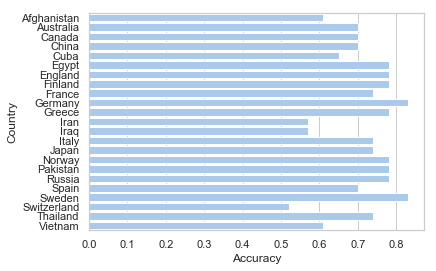

In [15]:
#import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Plot accuracy by country
sns.set_color_codes("pastel")
sns.barplot(x="Accuracy", y="Country", data=df[['Country', 'Accuracy']].sort_values(by = 'Country'), label="Total", color="b")

In [16]:
#function to print out average accuracy and st. deviation.
def print_results(df):
    return print("Average accuracy over all possible training pairs: {0:.2f}, standard deviation: {1:.2f}".format(df['Accuracy'].mean(), df.loc[:,"Accuracy"].std()))

In [17]:
print_results(df)

Average accuracy over all possible training pairs: 0.71, standard deviation: 0.09


# Q3.

Looking at your predictions, can you think of an easy way to improve performance?

I would offer to use relationship 'capital-world' to predict capitals which were predicted not correct. 

Select only records with false prediction and apply normal function predict_capital, see results.

In [18]:
TestTuples_temp = testtuples['capital-world']

In [19]:
#try to improve performance by checking false predictions in capital-world subset

aPredicted_capitals = []
aPredicted_capitals = predict_capital(city_train, country_train, TestTuples)
df = pd.DataFrame(list(zip([a[0] for a in TestTuples], [a[0] for a in aPredicted_capitals], [a[1] for a in aPredicted_capitals])), columns=['Given data','Predicted data', 'Country'])
df['Correct'] = np.equal(df['Given data'], df['Predicted data'])
df_temp = df[df['Correct']== False]
df_temp

,Given data,Predicted data,Country,Correct
4,Berlin,Frankfurt,Germany,False
5,Bern,Zurich,Switzerland,False
7,Canberra,Sydney,Australia,False
17,Ottawa,Toronto,Canada,False
19,Rome,Milan,Italy,False
22,Tokyo,Osaka,Japan,False


In [20]:
for i in range(0, len(df_temp)):
    aList = predict_capital(df_temp.iloc[i]['Given data'], df_temp.iloc[i]['Country'], TestTuples_temp)
    df_temp2 = pd.DataFrame(aList, columns=['Capital', 'Country'])
    print('Performance for given pair: ({}, {})'.format(df_temp.iloc[i]['Given data'], df_temp.iloc[i]['Country']))
    df_temp3 = df_temp2.loc[df_temp2['Country'].isin(list(df_temp['Country']))]
    df_temp3['Correct'] = np.equal(df_temp3['Capital'], df_temp['Given data'])
    print(df_temp3)
    print(" ")
    #print('Accuracy:', evaluate_accuracy(df_temp['Given data'], df_temp3['Capital']))
    #print_results(df)

Performance for given pair: (Berlin, Germany)
    Capital      Country  Correct
20   Munich      Germany    False
21   Zurich  Switzerland    False
29   Sydney    Australia    False
82   Ottawa       Canada     True
89     Rome        Italy     True
104   Tokyo        Japan     True
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Performance for given pair: (Bern, Switzerland)
       Capital      Country  Correct
20      Berlin      Germany     True
21     Hanover  Switzerland    False
29      Sydney    Australia    False
82   Brunswick       Canada    False
89        Rome        Italy     True
104      Tokyo        Japan     True
 
Performance for given pair: (Canberra, Australia)
      Capital      Country  Correct
20     Berlin      Germany     True
21      Swiss  Switzerland    False
29   Brisbane    Australia    False
82     Ottawa       Canada     True
89      Milan        Italy    False
104     Tokyo        Japan     True
 
Performance for given pair: (Ottawa, Canada)
      Capital      Country  Correct
20    Hamburg      Germany    False
21      Swiss  Switzerland    False
29   Canberra    Australia     True
82    Toronto       Canada    False
89      Milan        Italy    False
104     Tokyo        Japan     True
 
Performance for given pair: (Rome, Italy)
                  Capital      Country  Correc

Conclusion:

it is possible to improve accuracy a little (we can observe only 50% as the best case of prediction among given false predicted values), but not for 100%. Hence, I can say that there is some uncertainty with vectors, as some records could not be predicted correctly even using different relationships.
So might be the issue, to extract directly capital from 'capital-world' if the amount of unpredicted capitals is small.

# Q4.

Adapt your code so that you can predict the country of which a city is capital. Is performance the
same, higher or lower this way round?

In [26]:
def predict_country(country, capital_city, GivenData):
    aList = []
    aTemp = []
    for i in GivenData:
        second_capital = i[0]
        aTemp = mymodel.most_similar(positive = [country, second_capital], negative = [capital_city])
        aList.append([second_capital, aTemp[0][0]])
    return aList

In [23]:
aPredict_country = []
aPredict_country = predict_country(country_train, city_train, TestTuples)

In [24]:
#look at given and predicted data
df2 = pd.DataFrame(list(zip([a[1] for a in TestTuples], [a[1] for a in aPredict_country], [a[0] for a in aPredict_country])), columns=['Given data','Predicted data', 'Capital'])
df2['Correct'] = np.equal(df2['Given data'], df2['Predicted data'])
df2

,Given data,Predicted data,Capital,Correct
0,Greece,Greece,Athens,True
1,Iraq,Iraq,Baghdad,True
2,Thailand,Thailand,Bangkok,True
3,China,China,Beijing,True
4,Germany,Germany,Berlin,True
5,Switzerland,Switzerland,Bern,True
6,Egypt,Egypt,Cairo,True
7,Australia,Australia,Canberra,True
8,Vietnam,Viet_Nam,Hanoi,False
9,Cuba,Cuba,Havana,True


In [25]:
print ("Accuracy of country's prediction for one pair ({}, {}) is {}.".format(country_train, 
                                                                              city_train, 
                                                                              evaluate_accuracy(TestTuples, aPredict_country, False)))

Accuracy of country's prediction for one pair (Japan, Tokyo) is 0.87.


In [26]:
#evaluate accuracy for all pairs
df4 = evaluate_acc_all_pairs(TestTuples, Capital = False)
df4

,Capital,Country,Accuracy
0,Athens,Greece,0.78
1,Baghdad,Iraq,0.74
2,Bangkok,Thailand,0.83
3,Beijing,China,0.74
4,Berlin,Germany,0.78
5,Bern,Switzerland,0.83
6,Cairo,Egypt,0.78
7,Canberra,Australia,0.78
8,Hanoi,Vietnam,0.87
9,Havana,Cuba,0.87


In [27]:
#print an average accuracy for predicting country by capital
print_results(df4)

Average accuracy over all possible training pairs: 0.79, standard deviation: 0.04


Conclusion:

A prediction for country by capital shows higher accuracy then prediction for capital by country with values 0.79 and 0.71 respectively.    

# Q5.

Adapt your code so that you can consider any of the relationships in testtuples. Rank the relationships
in order of easiness to predict. Why do you think some are easier than others?

In [28]:
def evaluate_acc_relationship(relationship):
    print('RELATIONSHIP:', relationship)
    df = evaluate_acc_all_pairs(testtuples[relationship], True)
    aList.append([df['Accuracy'].mean(), relationship])
    print_results(df)
    print(' ')
    return aList

In [29]:
k = 0
for i in testtuples.keys():
    if  k < 8:
        part_1 = evaluate_acc_relationship(i)
        k += 1 

RELATIONSHIP: gram3-comparative
Average accuracy over all possible training pairs: 0.74, standard deviation: 0.13
 
RELATIONSHIP: gram8-plural
Average accuracy over all possible training pairs: 0.79, standard deviation: 0.07
 
RELATIONSHIP: capital-common-countries
Average accuracy over all possible training pairs: 0.71, standard deviation: 0.09
 
RELATIONSHIP: city-in-state
Average accuracy over all possible training pairs: 0.42, standard deviation: 0.25
 
RELATIONSHIP: family
Average accuracy over all possible training pairs: 0.71, standard deviation: 0.09
 
RELATIONSHIP: gram2-opposite
Average accuracy over all possible training pairs: 0.33, standard deviation: 0.13
 
RELATIONSHIP: currency
Average accuracy over all possible training pairs: 0.35, standard deviation: 0.15
 
RELATIONSHIP: gram4-superlative
Average accuracy over all possible training pairs: 0.67, standard deviation: 0.13
 


In [44]:
df = pd.DataFrame(list(zip([a[1] for a in part_1], [a[0] for a in part_1])), columns = ['Relationship', 'Accuracy'])
df

,Relationship,Accuracy
0,gram3-comparative,0.741081
1,gram8-plural,0.788919
2,capital-common-countries,0.713478
3,city-in-state,0.421029
4,family,0.705652
5,gram2-opposite,0.330345
6,currency,0.352667
7,gram4-superlative,0.670000


In [49]:
for i in [x for x in testtuples.keys() if x not in list(df['Relationship'])]:
    part_2 = evaluate_acc_relationship(i)

RELATIONSHIP: gram6-nationality-adjective
Average accuracy over all possible training pairs: 0.93, standard deviation: 0.02
 
RELATIONSHIP: gram7-past-tense
Average accuracy over all possible training pairs: 0.72, standard deviation: 0.08
 
RELATIONSHIP: gram5-present-participle
Average accuracy over all possible training pairs: 0.73, standard deviation: 0.09
 
RELATIONSHIP: capital-world
Average accuracy over all possible training pairs: 0.65, standard deviation: 0.11
 
RELATIONSHIP: gram1-adjective-to-adverb
Average accuracy over all possible training pairs: 0.20, standard deviation: 0.08
 


Ranking relationships by descending accuracy:

In [74]:
sorted(part_1, reverse = True)

[[0.9290243902439022, 'gram6-nationality-adjective'],
 [0.7889189189189191, 'gram8-plural'],
 [0.7410810810810811, 'gram3-comparative'],
 [0.7260606060606061, 'gram5-present-participle'],
 [0.72225, 'gram7-past-tense'],
 [0.7134782608695651, 'capital-common-countries'],
 [0.7056521739130435, 'family'],
 [0.6700000000000002, 'gram4-superlative'],
 [0.6474137931034485, 'capital-world'],
 [0.4210294117647059, 'city-in-state'],
 [0.3526666666666667, 'currency'],
 [0.3303448275862069, 'gram2-opposite'],
 [0.19500000000000003, 'gram1-adjective-to-adverb']]

I splitted computing process for two parts as my laptop couldn't handle all within one cycle. Therefore I calculated average accuracy for every relationship and ranked it by descending accuracy, as if the accuracy is higher than more chances to be successful in prediction, hence easier to predict.

I think some are easier to predict then others because of the place of the word in vector space, some of them are near to each other while some are far enough from each other. 

It can be observed a second lowest accuracy for relationship 'gram2-opposite', the reason for that might be that those words are belong to different spaces in total vector space, hence too long distance between them and vector difference is very big. Similar situation with 'gram1-adjective-to-adverb', there by spelling words are close but has different sense.

# Q6

A critic might say that the evaluation carried out in Mikolov et al. (2013) does not test the importance
of the direction of the vector oset. London is close to England, so the vector dierence is very small.
Therefore, the method might do as well if it predicted the nearest neighbour of China as its capital.
Implement this nave baseline which predicts the closest neighbour of the test item. Evaluate it for
the dierent relationships in testtuples. Does it come close to doing as well as the vector oset
method for any of the relationships?

In [10]:
from itertools import chain
#words = list(chain.from_iterable(list(chain.from_iterable(list(testtuples['family'])))))
#len(words)

In [34]:
def most_similar(relationship):
    aList = []
    aList = []
    words = list(chain.from_iterable(list(testtuples[relationship])))
    for word in words:
        aList.append([word, mymodel.most_similar(positive = [word])[0][0], relationship])
    return pd.DataFrame(aList, columns = ['word', 'nearest', 'relationship'])

In [35]:
for i in ['capital-common-countries']:
    df = most_similar(i)
df

,word,nearest,relationship
0,Athens,Athens_Greece,capital-common-countries
1,Greece,Greek,capital-common-countries
2,Baghdad,Mosul,capital-common-countries
3,Iraq,Afghanistan,capital-common-countries
4,Bangkok,Chiang_Mai,capital-common-countries
5,Thailand,Thai,capital-common-countries
6,Beijing,China,capital-common-countries
7,China,Chinese,capital-common-countries
8,Berlin,Munich,capital-common-countries
9,Germany,Austria,capital-common-countries


In [37]:
def predict_nearest(item1, item11):
    for i in list(df['nearest']):
        second_item = i
        aTemp = mymodel.most_similar(positive = [second_item, item1], negative = [item11])
        aList.append([aTemp[0][0], second_item])
    return aList

In [40]:
#for i in testtuples['capital-common-countries']:
#    print( predict_nearest(i[1], i[0]))

I did not finish q6.
But from extraction the nearest values it is possible to see that accuracy will be lower than in general case.